# 毽球发球-SVM

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['SimHei']
rcParams['font.sans-serif'] = ['MicroSoft YaHei']


In [35]:
#蹴回旋球  专业组 480次 标签-1
#        业余组 490次 标签-0
cq_hxq = pd.read_excel('ALL_DataSet.xlsx')

#前44列 为特征 data L为target
data = cq_hxq.iloc[:,:44]

target = cq_hxq['L']

display(data,target)

,ave-ax,var-ax,stdevp-ax,stdsqrt-ax,max-ax,min-ax,delta-ax,ave-ay,var-ay,stdevp-ay,...,delta-y,ave-z,var-z,stdevp-z,stdsqrt-z,max-z,min-z,delta-z,sum-A,sum-W
0,1.644474,28.633779,5.261114,5.512133,15.261324,-8.414634,23.675958,1.126219,29.221978,5.314876,...,40.209059,1.070640,58.104712,7.494524,7.570611,31.385018,-15.409408,46.794426,115.151945,56.721691
1,0.391356,35.872953,5.888734,5.901724,21.594077,-11.297910,32.891987,-0.039450,23.025177,4.717804,...,21.445993,-0.434157,34.120744,5.743116,5.759503,18.876307,-15.897213,34.773520,7.955422,-23.620796
2,2.260592,64.977812,7.925395,8.241490,32.151569,-11.724739,43.876308,2.042600,65.806558,7.975776,...,46.350175,1.603947,77.155606,8.636189,8.783872,24.965158,-21.550523,46.515681,190.557206,170.010215
3,0.837866,47.887091,6.803738,6.855135,25.914635,-17.700349,43.614983,0.426452,59.071957,7.556646,...,41.114984,0.626648,46.130479,6.677784,6.707122,26.149826,-14.860628,41.010454,50.197096,44.971314
4,2.085649,87.595319,9.201928,9.435328,36.585368,-10.766551,47.351919,1.722347,91.922651,9.426482,...,41.454704,1.952710,75.286192,8.530923,8.751556,29.634148,-11.933798,41.567946,168.917036,141.215773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,2.398996,2.187915,1.464294,1.479160,6.660352,0.706738,5.953613,0.156514,1.691102,2.859826,...,136.646342,4.221222,318.726987,101586.892106,321.962877,816.060992,-343.073170,1159.134162,106.801172,3697.317238
2154,2.439777,2.561507,1.584385,1.600471,6.903711,0.532324,6.371387,0.096520,1.799604,3.238575,...,140.817078,16.712194,318.521831,101456.157135,321.755639,804.256100,-357.109766,1161.365866,110.715625,3704.658544
2155,2.591238,3.959854,1.969938,1.989938,8.660547,0.560840,8.099707,0.115670,1.549509,2.400979,...,277.548784,33.282195,349.122171,121886.290518,352.666650,910.304900,-315.951224,1226.256124,117.428125,4901.414661
2156,2.652469,2.561773,1.584468,1.600554,7.439258,1.015039,6.424219,0.240359,1.820730,3.315059,...,293.707323,9.965611,343.210841,117793.681321,346.695304,845.512222,-380.719526,1226.231748,124.294824,-123.146262


0       0
1       0
2       0
3       0
4       0
       ..
2153    1
2154    1
2155    1
2156    1
2157    1
Name: L, Length: 2158, dtype: int64

# 归一化、标准化

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
transfer = StandardScaler()
data = transfer.fit_transform(data)
display(data,target)

array([[-0.02414517, -0.34194771, -0.24326301, ..., -1.08074805,
         0.15124981, -0.75484047],
       [-0.74595821, -0.313171  , -0.16224778, ..., -1.10071497,
        -0.57131548, -0.79670597],
       [ 0.33074666, -0.19747522,  0.10065098, ..., -1.08121105,
         0.65952398, -0.69580719],
       ...,
       [ 0.52120356, -0.44002993, -0.66809857, ...,  0.87835618,
         0.16659255,  1.76967042],
       [ 0.55647314, -0.44558749, -0.71785637, ...,  0.87831569,
         0.21287799, -0.84856748],
       [ 0.4343684 , -0.44312561, -0.69447057, ...,  0.78797261,
         0.07286444,  0.58821162]])

0       0
1       0
2       0
3       0
4       0
       ..
2153    1
2154    1
2155    1
2156    1
2157    1
Name: L, Length: 2158, dtype: int64

In [38]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [39]:
# 2d可视化
transfer = PCA(n_components=2)
PCA_data = transfer.fit_transform(data)
print(PCA_data)
principalDf = pd.DataFrame(data=PCA_data, columns=['PC1', 'PC2'])
principalDf.sample(5)

[[ 1.49806307 -3.94202221]
 [ 1.70257986 -3.68032264]
 [ 2.50797503 -3.61364896]
 ...
 [-4.43777058  1.21019406]
 [-4.58067288  1.95990887]
 [-3.69114717  0.5726041 ]]


,PC1,PC2
1954,-5.153904,1.894490
402,6.155665,-1.105215
744,5.934598,0.790913
2062,-4.467622,0.978648
1369,-2.034169,-2.106903


In [40]:
#将两个dataframe按照axis=1方向（行）合并
finalDf = pd.concat([principalDf, target], axis = 1) 

finalDf.sample(5)

,PC1,PC2,L
1392,-2.247878,-1.706467,1
682,4.375052,-2.126681,0
1060,-3.930722,0.174815,1
811,8.277081,3.434732,0
1860,-6.887197,5.599905,1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


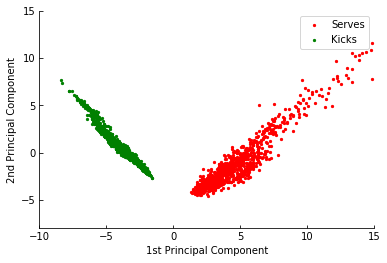

In [42]:
#2d可视化
plt.figure(figsize = (6, 4))
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
# plt.title("2 components's PCA", size=20)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-10,15) 
ax.set_ylim(-8,15)
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
#花的种类
targets = ['Serves', 'Kicks']
#在图中对三种花依次标注红绿蓝
colors = ['r', 'g']

#将三种花选出来;
#finalDf[finalDf['target']==0] 挑选出target为0的花
flower_datas = [finalDf[finalDf['L']==0],
          finalDf[finalDf['L']==1]]

for flower_data, color in zip(flower_datas, colors):
    plt.scatter(flower_data.PC1, flower_data.PC2 , c=color, s=5)
    plt.legend(targets)
    plt.grid()

In [44]:
#3d可视化
transfer = PCA(n_components=3)
PCA_data = transfer.fit_transform(data)
print(PCA_data)
principalDf = pd.DataFrame(data=PCA_data, columns=['PC1', 'PC2','PC3'])
principalDf.sample(5)

[[ 1.49806307 -3.94202221 -0.70404708]
 [ 1.70257986 -3.68032264 -1.82405722]
 [ 2.50797503 -3.61364896  0.76826106]
 ...
 [-4.43777058  1.21019406  0.83968982]
 [-4.58067288  1.95990887 -0.39706448]
 [-3.69114717  0.5726041   0.13113704]]


,PC1,PC2,PC3
1253,-2.125414,-1.845707,-1.761940
125,3.640207,-2.315278,-0.444257
1123,-2.581976,-1.007130,-1.322401
1785,-4.809689,1.614300,0.083623
1815,-5.530380,3.549788,1.884005


In [45]:
#将两个dataframe按照axis=1方向（行）合并
finalDf = pd.concat([principalDf, target], axis = 1) 

finalDf.sample(5)

,PC1,PC2,PC3,L
385,4.077322,-3.125379,4.359822,0
1116,-2.750432,-0.839866,-1.350873,1
502,19.872595,15.040548,2.495884,0
489,6.375020,-1.843809,8.471215,0
357,2.826439,-3.507301,1.072152,0


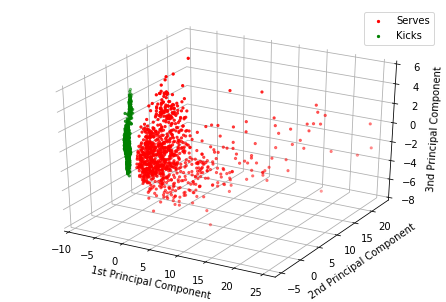

In [49]:
#3D图
from mpl_toolkits.mplot3d import Axes3D  #三维绘图
# colors = ['r', 'g']
# principalDf = np.array(principalDf)
# x1=principalDf[:,0]  
# x2=principalDf[:,1]
# x3=principalDf[:,2]
# fig=plt.figure()
# ax=Axes3D(fig)
# ax.scatter(x1,x2,x3,c=colors)


fig=plt.figure()
ax=Axes3D(fig)



# ax.figure(figsize = (8, 8))
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.zlabel('PC3')
# ax.title("3 components's PCA", size=20)


#花的种类
targets = ['Serves', 'Kicks']
#在图中对三种花依次标注红绿蓝
colors = ['r', 'g']

#将三种花选出来;
#finalDf[finalDf['target']==0] 挑选出target为0的花
flower_datas = [finalDf[finalDf['L']==0],
          finalDf[finalDf['L']==1]]

ax.w_xaxis.set_pane_color((0,0,0,0)) 
ax.w_yaxis.set_pane_color((0,0,0,0)) 
ax.w_zaxis.set_pane_color((0,0,0,0)) 
ax.set_xlabel("1st Principal Component")
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3nd Principal Component')

# ax.set_xlim(-10,15) 
# ax.set_ylim(-8,15)
ax.set_zlim(-8,6) 

for flower_data, color in zip(flower_datas, colors):
    ax.scatter(flower_data.PC1, flower_data.PC2 ,flower_data.PC3, c=color, s=5)
    ax.legend(targets)
    ax.grid()

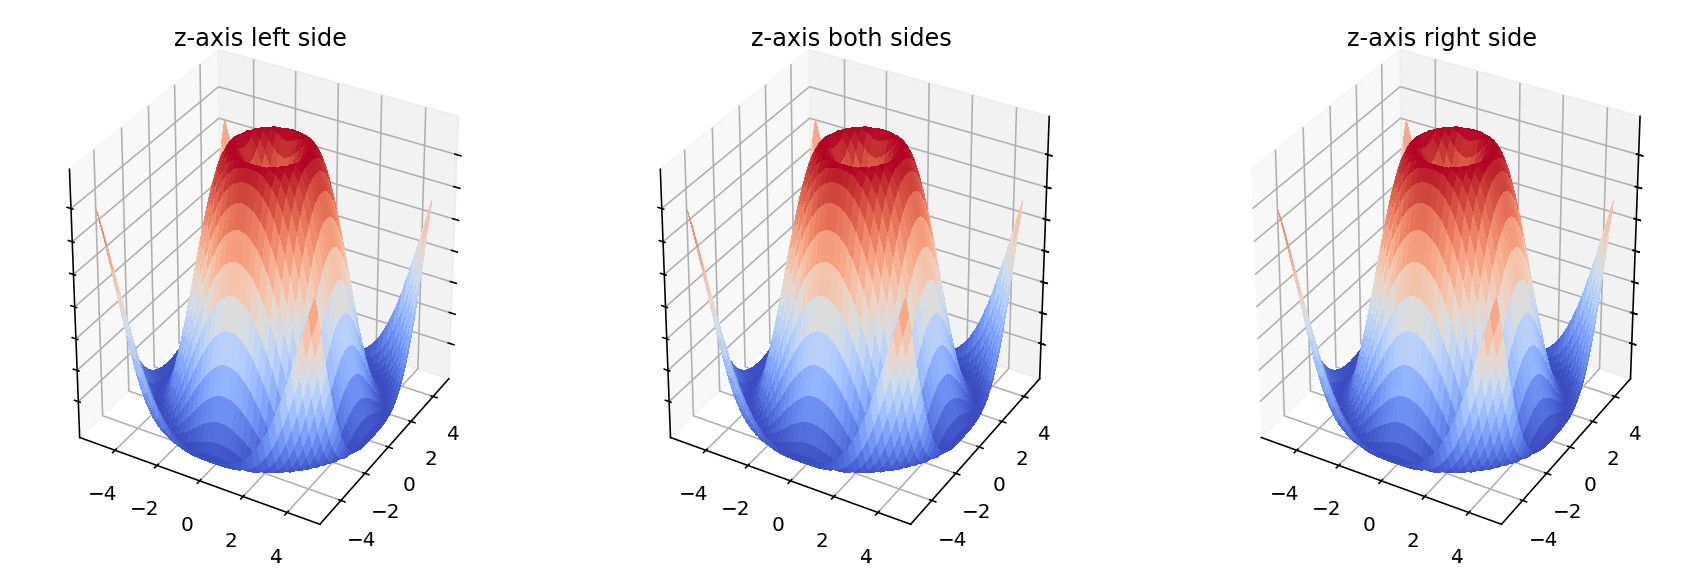

In [22]:
import matplotlib
matplotlib.use('QT4Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

class MyAxes3D(axes3d.Axes3D):

    def __init__(self, baseObject, sides_to_draw):
        self.__class__ = type(baseObject.__class__.__name__,
                              (self.__class__, baseObject.__class__),
                              {})
        self.__dict__ = baseObject.__dict__
        self.sides_to_draw = list(sides_to_draw)
        self.mouse_init()

    def set_some_features_visibility(self, visible):
        for t in self.w_zaxis.get_ticklines() + self.w_zaxis.get_ticklabels():
            t.set_visible(visible)
        self.w_zaxis.line.set_visible(visible)
        self.w_zaxis.pane.set_visible(visible)
        self.w_zaxis.label.set_visible(visible)

    def draw(self, renderer):
        # set visibility of some features False 
        self.set_some_features_visibility(False)
        # draw the axes
        super(MyAxes3D, self).draw(renderer)
        # set visibility of some features True. 
        # This could be adapted to set your features to desired visibility, 
        # e.g. storing the previous values and restoring the values
        self.set_some_features_visibility(True)

        zaxis = self.zaxis
        draw_grid_old = zaxis.axes._draw_grid
        # disable draw grid
        zaxis.axes._draw_grid = False

        tmp_planes = zaxis._PLANES

        if 'l' in self.sides_to_draw :
            # draw zaxis on the left side
            zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
                             tmp_planes[0], tmp_planes[1],
                             tmp_planes[4], tmp_planes[5])
            zaxis.draw(renderer)
        if 'r' in self.sides_to_draw :
            # draw zaxis on the right side
            zaxis._PLANES = (tmp_planes[3], tmp_planes[2], 
                             tmp_planes[1], tmp_planes[0], 
                             tmp_planes[4], tmp_planes[5])
            zaxis.draw(renderer)

        zaxis._PLANES = tmp_planes

        # disable draw grid
        zaxis.axes._draw_grid = draw_grid_old

def example_surface(ax):
    """ draw an example surface. code borrowed from http://matplotlib.org/examples/mplot3d/surface3d_demo.html """
    from matplotlib import cm
    import numpy as np
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2)
    Z = np.sin(R)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

if __name__ == '__main__':
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(131, projection='3d')
    ax.set_title('z-axis left side')
    ax = fig.add_axes(MyAxes3D(ax, 'l'))
    example_surface(ax) # draw an example surface
    ax = fig.add_subplot(132, projection='3d')
    ax.set_title('z-axis both sides')
    ax = fig.add_axes(MyAxes3D(ax, 'lr'))
    example_surface(ax) # draw an example surface
    ax = fig.add_subplot(133, projection='3d')
    ax.set_title('z-axis right side')
    ax = fig.add_axes(MyAxes3D(ax, 'r'))
    example_surface(ax) # draw an example surface
    plt.show()

In [23]:
#test_size = 0.2. train_size = 0.8
#训练：测试 = 4:1
data_train,data_test,target_train,target_test = train_test_split(data,target,test_size = 0.3,random_state = 265)

# PCA降维

In [24]:
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# transfer = PCA(n_components=3)
# PCA_data_train = transfer.fit_transform(data_train)
# PCA_data_test = transfer.fit_transform(data_test)


In [25]:
#pca降维后的模型
from sklearn.metrics import accuracy_score
accuracy = 0
for i in range(50):
    ss = svm.SVC()
    ss.fit(data_train,target_train)
    target_ = ss.predict(data_test)
    accuracy += accuracy_score(target_test,target_)/50
print('---------多次训练平均准确率：%0.3f'%(accuracy))

---------多次训练平均准确率：0.992


In [123]:
# from sklearn.metrics import accuracy_score
# accuracy = 0
# for i in range(50):
#     ss = svm.SVC()
#     ss.fit(data_train,target_train)
#     target_ = ss.predict(data_test)
#     accuracy += accuracy_score(target_test,target_)/50
# print('---------多次训练平均准确率：%0.3f'%(accuracy))

---------多次训练平均准确率：0.992


In [124]:
from sklearn.metrics import confusion_matrix

confusion_matrix(target_test,target_)

array([[243,   2],
       [  2, 229]])

In [125]:
from sklearn.metrics import classification_report

print(classification_report(target_test,target_,target_names = ['专业','业余']))

              precision    recall  f1-score   support

          专业       0.99      0.99      0.99       245
          业余       0.99      0.99      0.99       231

    accuracy                           0.99       476
   macro avg       0.99      0.99      0.99       476
weighted avg       0.99      0.99      0.99       476

